# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url  = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
         file.write(response.content)

In [4]:
df_predict = pd.read_csv('image-predictions/image-predictions.tsv', sep = '\t')
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query each tweet's retweet count, favorite "like" count, and store in tweet_json.txt

# Code Source: twitter_api.py from Udacity nanodegree 
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
"""
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Succ

In [6]:
# Read tweet_json.txt line by line into pandas df with tweet_id, retweet_count, favorite_count
df_json = pd.read_json('tweet_json.txt', lines = True)
df_json = df_json[["id", "retweet_count", "favorite_count"]]
df_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [10]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1288,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708349470...,11,10,River,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None


In [11]:
df_json.sample(5)

,id,retweet_count,favorite_count
1188,718234618122661888,1127,4217
659,791312159183634433,2963,9841
1463,694352839993344000,700,2244
2192,668892474547511297,164,422
731,781524693396357120,6426,23163


In [12]:
df[df.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [13]:
df[df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [14]:
df_predict.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
250     0.071124
145     0.071536
680     0.072885
701     0.081101
1831    0.082489
18      0.086502
109     0.088530
568     0.088540
301     0.089165
1627    0.090341
1503    0.090341
954     0.090508
277     0.096063
2074    0.097049
664     0.097232
789     0.097500
515     0.098283
1664    0.099804
731     0.100499
1723    0.100896
1037    0.105171
247     0.107317
876     0.107948
866     0.110587
1245    0.111493
          ...   
76      0.999091
1988    0.999120
2045    0.999201
863     0.999223
1872    0.999281
1548    0.999306
95      0.999335
611     0.999365
1711    0.999403
512     0.999484
168     0.999614
107     0.999647
1796    0.999715
1455    0.999823
1687    0.999828
1725    0.999833
331     0.999834
1014    0.999837
594     0.999846
475     0.999876
865     0.999885
45      0.999888
1447    0.999916
242     0.999924
230     0.999945
1372    0.999953
149     0.999956
1229    0.9999

In [15]:
df[['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only eve...,13,10
1,This is Tilly. She's just checking pup on you....,13,10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,This is Darla. She commenced a snooze mid meal...,13,10
4,This is Franklin. He would like you to stop ca...,12,10
5,Here we have a majestic great white breaching ...,13,10
6,Meet Jax. He enjoys ice cream so much he gets ...,13,10
7,When you watch your owner call another dog a g...,13,10
8,This is Zoey. She doesn't want to be one of th...,13,10
9,This is Cassie. She is a college pup. Studying...,14,10


### Quality issues (content)
1. `image predictions` table (df_predict): 'p1' and 'p2' contain predictions that are not dogs. Some 'p1_dog' and 'p2_dog' values are False 

2. `twitter-archive-enhanced` table (df): some of the 'name' column values are values that are not dog names

3. `twitter-archive-enhanced` table (df): tweet_id should be string rather than integer
    `tweet-json.txt`table (df_json): id should be string rather than integer
    `image predictions`table (df_predict): tweet_id should be string rather than integer
    
4. `twitter-archive-enhanced` table (df): timestamps after Aug. 1,2017 can be removed

5. `twitter-archive-enhanced` table (df): remove rows with outlier ratings

6. `twitter-archive-enhanced` table (df): remove rows that are not blank or not null in in_reply_to_status_id and in_reply_to_user_id

7. `twitter-archive-enhanced` table (df): remove rows that are not blank or not null in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

8. `twitter-archive-enhanced`table (df): remove columns in_reply_to_status_id and in_reply_to_user_id after removing the values that are not null

9. `twitter-archive-enhanced` table (df): remove retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns after rows that are not blank or not null are removed

10. `tweet-json.txt`table (df_json): the 'id' column needs to be renamed 'tweet_id' to allow for merging

### Tidiness issues (structure)
1. `twitter-archive-enhanced` table (df): The 4 columns 'doggo,' 'floofer,' 'puppo,' 'pupper' can be combined to one column called dog_stage.

2. Merge the `twitter-archive-enhanced table` (df), `image predictions` table (df_predict), and the df_json table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
df_clean = df.copy()
df_predict_clean = df_predict.copy()
df_json_clean = df_json.copy()

### Issue #1:

#### Define: Remove rows from `twitter-archive-enhanced` table (df_clean) that are not blank or not null in in_reply_to_status_id and in_reply_to_user_id by using the drop, index, and notnull functions.

#### Code

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Show the rows of in_reply_to_status_id that are not null or not blank
df_clean[df_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [19]:
# Drop the rows where in_reply_to_status_id column is not null or not blank
df_clean = df_clean.drop(df_clean.index[df_clean['in_reply_to_status_id'].notnull()])

#### Test

In [20]:
# check if there are rows where in_reply_to_status_id column is not null or not blank
df_clean[df_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
# check if there are rows where in_reply_to_user_id column is not null or not blank
df_clean[df_clean['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define: Remove columns "in_reply_to_status_id," "in_reply_to_user_id" from `twitter-archive-enhanced` (df_clean) using the drop functions.

#### Code

In [22]:
#Drop the columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [23]:
# Check for the presence of the 2 columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 284.8+ KB


### Issue #3:

#### Define: In the `twitter-archive-enhanced` (df_clean), combine 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column called dog_stage. First, apply will be used to replace the 'None' values with ''. Next, join will be used to join the 4 columns into one column. Then, the new column will be assigned to df_clean, and drop will be used to drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.

#### Code

In [24]:
# Number of doggo
df_clean['doggo'].value_counts()

None     2185
doggo      93
Name: doggo, dtype: int64

In [25]:
# Number of floofer
df_clean['floofer'].value_counts()

None       2268
floofer      10
Name: floofer, dtype: int64

In [26]:
# Number of pupper
df_clean['pupper'].value_counts()

None      2025
pupper     253
Name: pupper, dtype: int64

In [27]:
# Number of puppo
df_clean['puppo'].value_counts()

None     2249
puppo      29
Name: puppo, dtype: int64

In [28]:
# remove 'None' and replace with ''
none_gone = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.replace('None', ''))
none_gone.head(15)

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,
9,doggo,,,


In [29]:
#combine 4 columns into 1
one_col = none_gone.apply(lambda x: " ".join(x), axis = 1).str.strip()
one_col.value_counts()

                 1906
pupper            242
doggo              80
puppo              28
doggo  pupper      11
floofer             9
doggo floofer       1
doggo   puppo       1
dtype: int64

In [30]:
# assign column the name dog_stage
df_clean['dog_stage'] = one_col

In [31]:
#Remove columns 'doggo', 'floofer', 'pupper', 'puppo'
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [32]:
#The number in each category is the same
df_clean['dog_stage'].value_counts()

                 1906
pupper            242
doggo              80
puppo              28
doggo  pupper      11
floofer             9
doggo floofer       1
doggo   puppo       1
Name: dog_stage, dtype: int64

In [33]:
# The columns are removed
df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


### Issue #4:

#### Define:  Remove rows from `image predictions`table (df_predict_clean) in which 'p1_dog' or 'p2_dog' values are False by using drop. 

#### Code

In [34]:
# Both True and False values in p1_dog
df_predict_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [35]:
# Both True and False values in p2_dog
df_predict_clean['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [36]:
# Drop the rows where p1_dog or p2_dog are False
df_predict_clean = df_predict_clean.drop(df_predict_clean.index[df_predict_clean['p1_dog'] == False])
df_predict_clean = df_predict_clean.drop(df_predict_clean.index[df_predict_clean['p2_dog'] == False])

#### Test

In [37]:
# Only true values are left for p1_dog
df_predict_clean['p1_dog'].value_counts()

True    1398
Name: p1_dog, dtype: int64

In [38]:
# Only true values are left for p2_dog
df_predict_clean['p2_dog'].value_counts()

True    1398
Name: p2_dog, dtype: int64

### Issue #5:

#### Define: Remove the rows from df_clean where 'name' does not contain real names by using the drop function. Names that begin with lowercase letters and have the value 'None' will be dropped.

#### Code

In [39]:
# value counts of different names
df_clean['name'].value_counts()

None          668
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Daisy           7
Buddy           7
Bailey          7
Toby            7
Stanley         6
Scout           6
Bella           6
Leo             6
Jack            6
Jax             6
Oscar           6
Koda            6
Dave            6
Milo            6
Rusty           6
Sammy           5
             ... 
Brandonald      1
Vinscent        1
Pilot           1
Carper          1
Mona            1
Skye            1
Georgie         1
Nico            1
Beya            1
Bruiser         1
Julio           1
Loomis          1
Kawhi           1
Beebop          1
Gilbert         1
Ralphus         1
Molly           1
Sully           1
Terrenth        1
Mingus          1
Remy            1
Opie            1
Stu             1
Kathmandu       1
Karl      

In [40]:
# Show the lower case names since they do not seem to be real names.
df_clean[df_clean['name'].str.islower()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper
118,869988702071779329,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,
335,832645525019123713,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,
369,828650029636317184,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,
542,806219024703037440,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,
649,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,
682,788552643979468800,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,pupper


In [41]:
# Number of lower case names(True) and capital names
df_clean['name'].str.islower().value_counts()

False    2169
True      109
Name: name, dtype: int64

In [42]:
# Drop the rows with names that begin with a lower case letter.
df_clean = df_clean.drop(df_clean.index[df_clean['name'].str.islower() == True])

In [43]:
# Show rows where name is 'None'
df_clean[df_clean['name']=='None']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
24,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,
25,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,
32,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,
35,885518971528720385,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,
37,885167619883638784,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,
41,884441805382717440,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,
42,884247878851493888,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,


In [44]:
# Drop rows where name is 'None'
df_clean = df_clean.drop(df_clean.index[df_clean['name'] == 'None'])

#### Test

In [45]:
#Test if there are any names that begin with a lower case letter.
df_clean['name'].str.islower().value_counts()

False    1501
Name: name, dtype: int64

In [46]:
df_clean[df_clean['name']=='None']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #6:

#### Define: In the `twitter-archive-enhanced` table (df_clean), change the tweet_id from an integer to a string using astype. In the `tweet-json.txt` table (df_json_clean), change the id from an integer to a string. In the `image predictions` table (df_predict_clean), change the tweet_id from an integer to a string.

#### Code

In [47]:
# Change tweet_id to a string in df_clean
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

In [48]:
# Change id to a string in df_json_clean
df_json_clean['id'] = df_json_clean['id'].astype(str)

In [49]:
# Change tweet_id to a string in df_predict_clean
df_predict_clean['tweet_id'] = df_predict_clean['tweet_id'].astype(str)

#### Test

In [50]:
# Data types of df_clean
df_clean.dtypes

tweet_id                       object
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_stage                      object
dtype: object

In [51]:
# Data types of df_json_clean
df_json_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

In [52]:
# Data types of df_predict_clean
df_predict_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #7:

#### Define: Remove timestamps after Aug. 1, 2017 from twitter-archive-enhanced table (df_clean) using drop().

#### Code

In [53]:
# Show rows with timestamps after 2017-08-01 in df_clean
df_clean[df_clean['timestamp'] > '2017-08-01']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [54]:
# Drop rows with timestamps after 2017-08-01 from df_clean
df_clean = df_clean.drop(df_clean.index[df_clean['timestamp'] > '2017-08-01'])

#### Test

In [55]:
# No rows with timestamps after 2017-08-01 in df_clean
df_clean[df_clean['timestamp'] > '2017-08-01']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #8:

#### Define: twitter-archive-enhanced table (df_clean): remove rows with outlier ratings using drop().

#### Code

In [56]:
# Show all rows where the ratio of ratings numerator to ratings denominator is greater than 1.4
df_clean[df_clean['rating_numerator']/df_clean['rating_denominator'] > 1.4]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,


In [57]:
# Drop all rows where the ratio of ratings numerator to ratings denominator is greater than 1.4
df_clean = df_clean.drop(df_clean.index[df_clean['rating_numerator']/df_clean['rating_denominator'] > 1.4])

#### Test

In [58]:
# Show all rows where the ratio of ratings numerator to ratings denominator is greater than 1.4
df_clean[df_clean['rating_numerator']/df_clean['rating_denominator'] > 1.4]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #9:

#### Define: remove rows from `twitter-archive-enhanced` table (df_clean) that are not blank or not null in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp using notnull() and drop().

#### Code

In [59]:
# There are 174 rows where retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp that are not null
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 2 to 2325
Data columns (total 12 columns):
tweet_id                      1494 non-null object
timestamp                     1494 non-null object
source                        1494 non-null object
text                          1494 non-null object
retweeted_status_id           110 non-null float64
retweeted_status_user_id      110 non-null float64
retweeted_status_timestamp    110 non-null object
expanded_urls                 1494 non-null object
rating_numerator              1494 non-null int64
rating_denominator            1494 non-null int64
name                          1494 non-null object
dog_stage                     1494 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 151.7+ KB


In [60]:
# Drop rows that contain non-null values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
df_clean = df_clean.drop(df_clean.index[df_clean['retweeted_status_id'].notnull()])

#### Test

In [61]:
# Check if there are rows where retweeted_status_id are not null
df_clean[df_clean['retweeted_status_id'].notnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [62]:
# Check if there are rows where retweeted_status_timestamp are not null
df_clean[df_clean['retweeted_status_timestamp'].notnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #10:

#### Define: twitter-archive-enhanced table (df): remove retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp after rows that are not blank or not null are removed

#### Code

In [63]:
# drop excess columns
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [64]:
# check if columns have been dropped
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 2 to 2325
Data columns (total 9 columns):
tweet_id              1384 non-null object
timestamp             1384 non-null object
source                1384 non-null object
text                  1384 non-null object
expanded_urls         1384 non-null object
rating_numerator      1384 non-null int64
rating_denominator    1384 non-null int64
name                  1384 non-null object
dog_stage             1384 non-null object
dtypes: int64(2), object(7)
memory usage: 108.1+ KB


### Issue #11:

#### Define: Rename 'id' column 'tweet_id' in the df_json_clean table by using rename method. 

#### Code

In [65]:
# Replace column name 'id' with 'tweet_id'
df_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [66]:
# Print the first 5 rows
df_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #12:

#### Define: Merge `twitter-archive-enhanced table` (df_clean), `image predictions` table (df_predict_clean), and the df_json_clean table by using merge method and joining them on tweet_id, tweet_id, and id. 

#### Code

In [67]:
# Merge df_clean and df_predict_clean tables together into new table, df_df_predict_clean
df_df_predict_clean = pd.merge(df_clean, df_predict_clean,
                            on=['tweet_id', 'tweet_id'], how='inner')

In [68]:
# Print the first 5 rows of df_df_predict_clean head to check merge
df_df_predict_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
3,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
4,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [69]:
# Merge df_df_predict_clean and df_json_clean tables creating new table, twitter_archive_master_clean
twitter_archive_master_clean = pd.merge(df_df_predict_clean, df_json_clean,
                            on=['tweet_id', 'tweet_id'], how='inner')

#### Test

In [70]:
# Print the first 5 rows of twitter_archive_master_clean head to check merge
twitter_archive_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
2,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
3,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
4,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
# twitter_archive_master_clean to twitter_archive_master.csv
twitter_archive_master_clean.to_csv('twitter_archive_master.csv', index_label=False)

In [72]:
test_archive = pd.read_csv('twitter_archive_master.csv')
test_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
2,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
3,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
4,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
# 5 favorite dogs
fav_five = test_archive[['tweet_id','name','favorite_count']].sort_values(by=['favorite_count'], ascending=False)
fav_five.head(5)

,tweet_id,name,favorite_count
37,879415818425184262,Duddles,107956
246,807106840509214720,Stephan,107015
71,866450705531457537,Jamesy,106827
199,819004803107983360,Bo,95450
61,870374049280663552,Zoey,85011


In [74]:
test_archive[test_archive['tweet_id']==807106840509214720]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
246,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625,107015


In [75]:
# 5 most retweeted dogs
most_retweets = test_archive[['tweet_id','name','retweet_count']].sort_values(by=['retweet_count'], ascending=False)
most_retweets.head(5)

,tweet_id,name,retweet_count
246,807106840509214720,Stephan,56625
37,879415818425184262,Duddles,45849
199,819004803107983360,Bo,42228
71,866450705531457537,Jamesy,32883
204,817827839487737858,Buddy,31314


In [76]:
common_breeds = test_archive['p1'].value_counts(ascending=False)
common_breeds.head(10)

golden_retriever      90
Pembroke              61
Labrador_retriever    58
Chihuahua             45
pug                   30
toy_poodle            24
chow                  22
Pomeranian            22
malamute              21
French_bulldog        20
Name: p1, dtype: int64

### Insights:
1. The 5 top favorite dogs are 'Duddles,' 'Stephan,' 'Jamesy,' 'Bo,' and 'Zoey.'

2. The 5 top most retweeted dogs are 'Stephan,' 'Duddles,' 'Bo,' 'Jamesy,' and 'Buddy.'

3. The top 10 dog breeds predicted by the neural network are golden retriever, pembroke, labrador retriever, Chihuahua, pug, toy poodle, pomeranian, chow, malamute, and French bulldog.

### Visualization

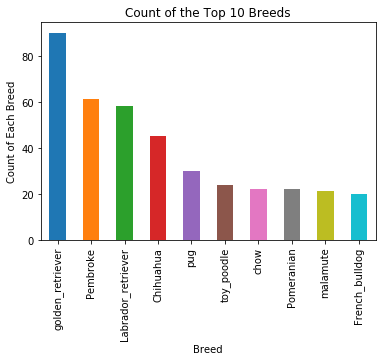

In [77]:
# bar chart of the numbers of the top 10 in each breed predicted by neural networks
plt.title('Count of the Top 10 Breeds')
plt.xlabel('Breed')
plt.ylabel('Count of Each Breed')
test_archive.p1.value_counts()[:10].plot(kind="bar");